## Sales and Marketing Spend Analysis
### Project Overview
This project aims to analyze the relationship between Marketing Spend and Sales Revenue in a business dataset. By performing exploratory data analysis (EDA), visualizing trends, and drawing insights, we will better understand how various factors such as marketing spend, product ratings, pricing, and seasonality influence sales revenue. The project further examines strategies that could lead to optimized sales performance, including price-discount strategies and product category impacts.

In [1]:
!pip install jupyter-dash plotly  jupyter-dash

#### Step 1: Import Necessary Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Step 2: Load the Dataset

In [5]:
file_path = r"C:\Users\sowja\Desktop\Data Analysis Projects\Sales and Marketing Spend Analysis\dataset.csv"
data = pd.read_csv(file_path)

# Display first few rows to understand the dataset
print("Initial Dataset:\n", data.head())

Initial Dataset:
    Unnamed: 0   Product_Name           Category  Sub_category    Price  \
0           0  Non-stick Pan     Home & Kitchen      Cookware   669.23   
1           1           Tent  Sports & Outdoors  Outdoor Gear    67.13   
2           2        Mascara    Beauty & Health        Makeup   463.25   
3           3    Cutlery Set     Home & Kitchen      Cookware  1499.18   
4           4        Blender     Home & Kitchen    Appliances   640.43   

   Rating  No_rating  Discount  M_Spend  Supply_Chain_E  Sales_y  Sales_m  \
0     1.6       3682     29.37  8654.97           50.76    95655     7587   
1     3.2       2827      5.97  1918.00           90.22    41371     5555   
2     3.5       4554     41.19  5885.23           87.81    97015     9716   
3     2.9       4976     46.97  7984.91           78.10    32454     3697   
4     2.4       3806     47.16  7846.50           95.87    38213     5136   

   Market_T  Seasonality_T  Success_Percentage  
0      0.44           4.2

#### Step 3: Data Cleaning and Exploration

In [7]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Drop unwanted columns like 'Unnamed: 0'
data = data.drop(columns=['Unnamed: 0'])

# Confirm dataset info (check datatypes, non-null values)
print("\nDataset Info:\n", data.info())



Missing values:
 Unnamed: 0            0
Product_Name          0
Category              0
Sub_category          0
Price                 0
Rating                0
No_rating             0
Discount              0
M_Spend               0
Supply_Chain_E        0
Sales_y               0
Sales_m               0
Market_T              0
Seasonality_T         0
Success_Percentage    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Name        500 non-null    object 
 1   Category            500 non-null    object 
 2   Sub_category        500 non-null    object 
 3   Price               500 non-null    float64
 4   Rating              500 non-null    float64
 5   No_rating           500 non-null    int64  
 6   Discount            500 non-null    float64
 7   M_Spend             500 non-null    float64
 8   Supply_Ch

#### Step 4: Descriptive Statistics

In [9]:

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
             Price     Rating    No_rating    Discount      M_Spend  \
count   500.00000  500.00000   500.000000  500.000000   500.000000   
mean    766.20076    2.99360  2551.020000   24.647160  5763.544960   
std     439.83131    1.15109  1425.214214   14.837882  2639.606616   
min       6.11000    1.00000    11.000000    0.010000  1007.830000   
25%     375.84750    2.00000  1336.750000   12.325000  3597.770000   
50%     787.40000    3.00000  2479.000000   23.840000  6007.110000   
75%    1159.92250    3.90000  3729.250000   37.880000  8169.945000   
max    1499.18000    5.00000  5000.000000   49.840000  9990.530000   

       Supply_Chain_E       Sales_y      Sales_m    Market_T  Seasonality_T  \
count      500.000000    500.000000   500.000000  500.000000     500.000000   
mean        75.098500  51192.204000  5122.296000   -0.061820       0.046740   
std         14.434724  28349.126031  2879.604143    2.844892       5.721412   
min         50.210000   104

#### Step 5: Visualizing Marketing Spend vs Sales

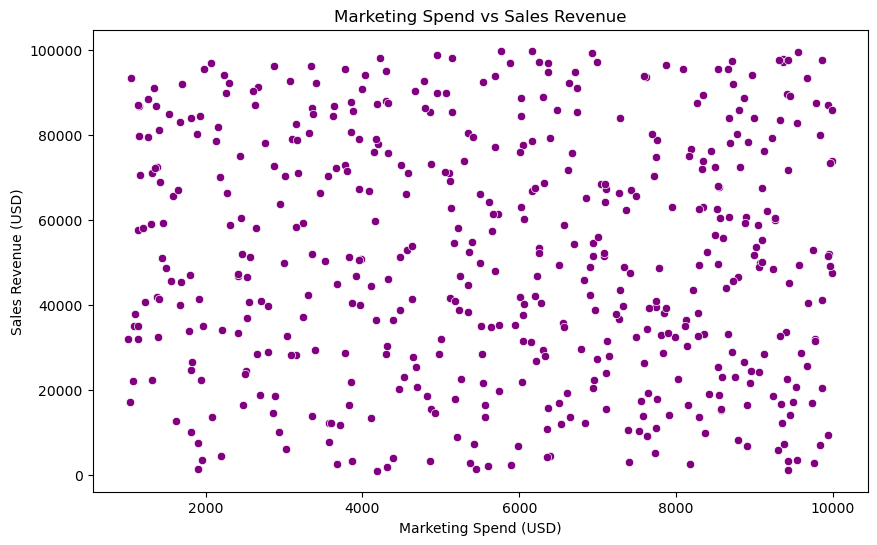

In [11]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='M_Spend', y='Sales_y', data=data, color='purple')
plt.title('Marketing Spend vs Sales Revenue')
plt.xlabel('Marketing Spend (USD)')
plt.ylabel('Sales Revenue (USD)')
plt.show()


#### Step 6: Correlation Analysis


Correlation between Marketing Spend and Sales Revenue:
           M_Spend   Sales_y
M_Spend  1.000000 -0.064776
Sales_y -0.064776  1.000000


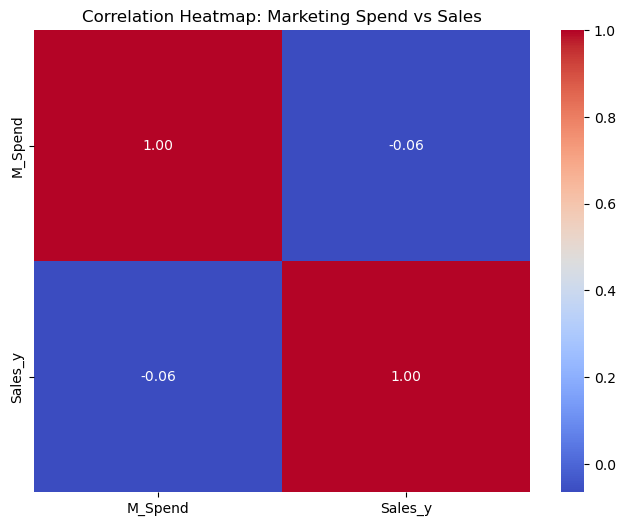

In [13]:

# Correlation between Marketing Spend and Sales Revenue
correlation = data[['M_Spend', 'Sales_y']].corr()
print("\nCorrelation between Marketing Spend and Sales Revenue:\n", correlation)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Marketing Spend vs Sales')
plt.show()

#### Step 7: Investigating Category Impact on Sales


Average Sales by Category:
 Category
Beauty & Health      48536.826923
Electronics          56146.540541
Fashion              49705.820225
Home & Kitchen       47840.709677
Sports & Outdoors    52844.679612
Name: Sales_y, dtype: float64


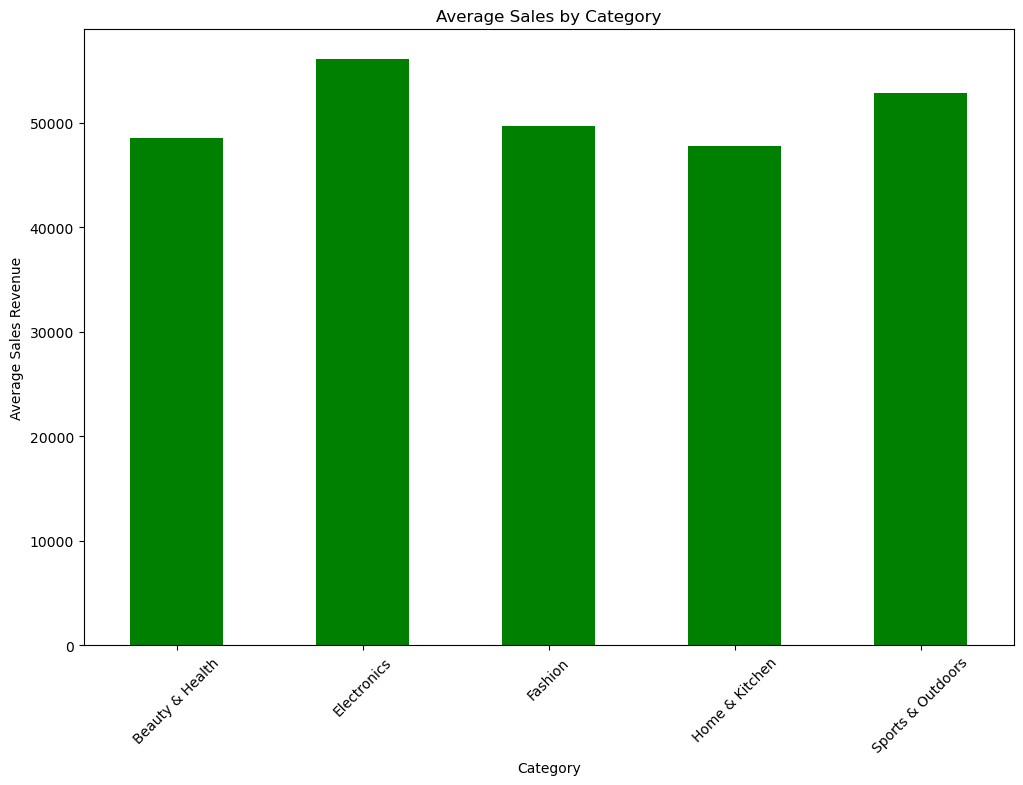

In [15]:

# Average Sales by Category
avg_sales_by_category = data.groupby('Category')['Sales_y'].mean()
print("\nAverage Sales by Category:\n", avg_sales_by_category)
# Bar plot for average sales by Category
plt.figure(figsize=(12, 8))
avg_sales_by_category.plot(kind='bar', color='green')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales Revenue')
plt.xticks(rotation=45)
plt.show()

#### Step 8: Investigating Product Rating vs Sales

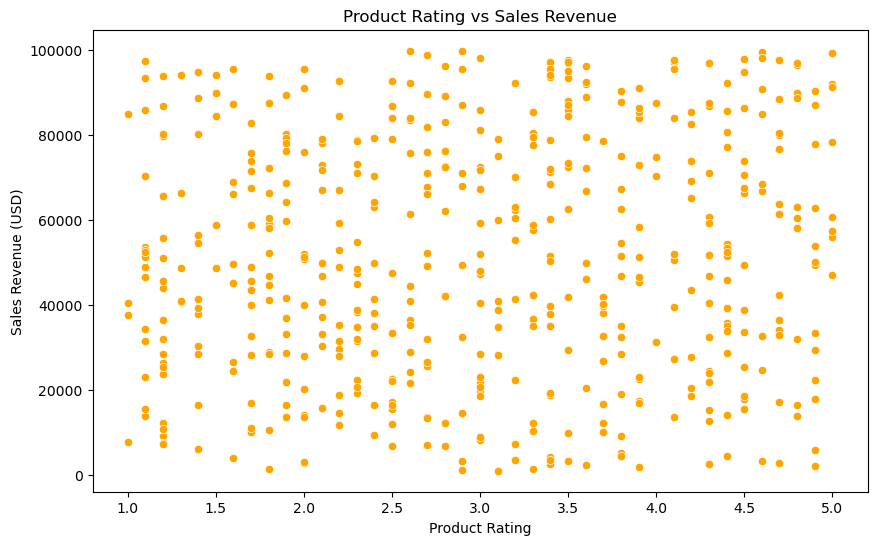

In [17]:

# Scatter plot for Product Rating vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Sales_y', data=data, color='orange')
plt.title('Product Rating vs Sales Revenue')
plt.xlabel('Product Rating')
plt.ylabel('Sales Revenue (USD)')
plt.show()


#### Step 9: Price vs Discount

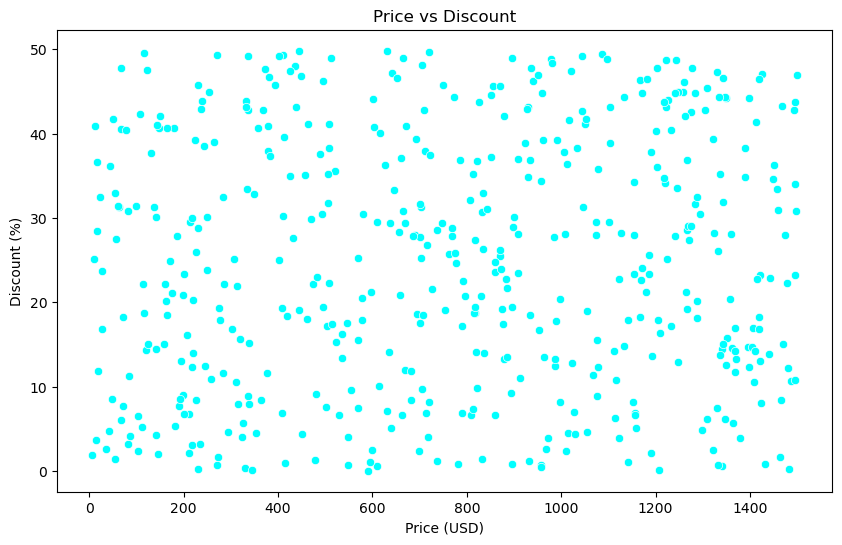

In [19]:

# Scatter plot to check how Price and Discount relate to Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Discount', data=data, color='cyan')
plt.title('Price vs Discount')
plt.xlabel('Price (USD)')
plt.ylabel('Discount (%)')
plt.show()

#### Step 10: Price Categories and Sales


Average Sales by Price Category:
 Price_Category
Low       49807.378882
Medium    51342.568862
High      52342.470930
Name: Sales_y, dtype: float64


C:\Users\sowja\AppData\Local\Temp\ipykernel_24600\3745226572.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_price = data.groupby('Price_Category')['Sales_y'].mean()


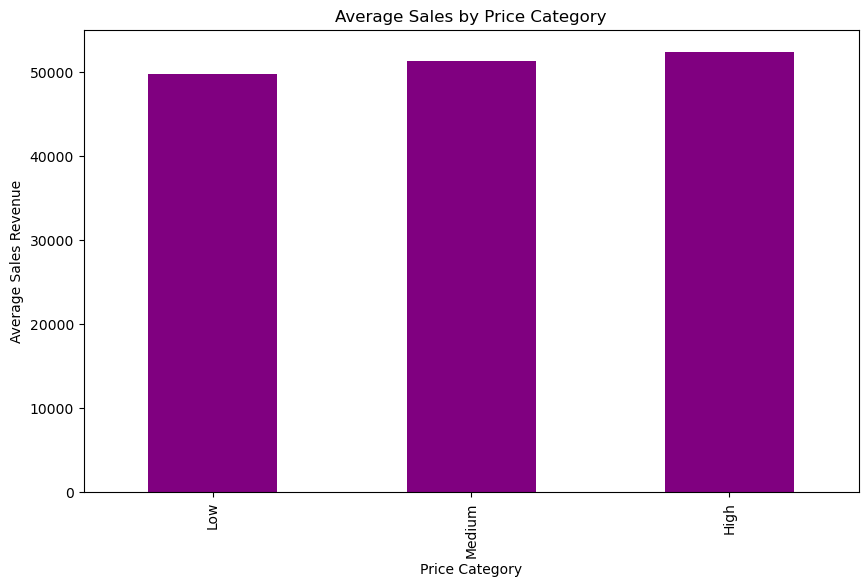

In [21]:

# Categorize Price into Low, Medium, High
data['Price_Category'] = pd.cut(data['Price'], bins=[0, 500, 1000, 1500], labels=["Low", "Medium", "High"])

# Average Sales by Price Category
avg_sales_by_price = data.groupby('Price_Category')['Sales_y'].mean()
print("\nAverage Sales by Price Category:\n", avg_sales_by_price)

# Bar plot for average sales by Price Category
plt.figure(figsize=(10, 6))
avg_sales_by_price.plot(kind='bar', color='purple')
plt.title('Average Sales by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Sales Revenue')
plt.show()

#### Step 11: Seasonality Impact on Sales

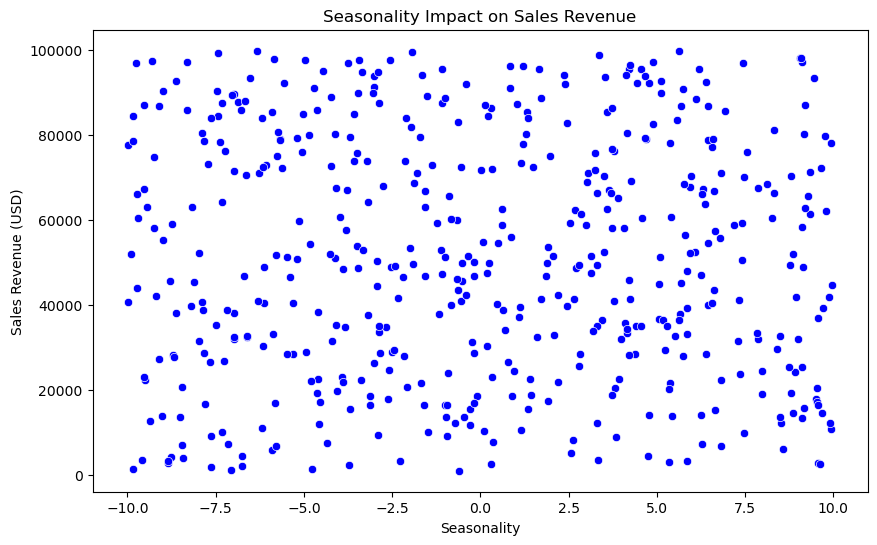

In [23]:

# Scatter plot for Seasonality vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seasonality_T', y='Sales_y', data=data, color='blue')
plt.title('Seasonality Impact on Sales Revenue')
plt.xlabel('Seasonality')
plt.ylabel('Sales Revenue (USD)')
plt.show()

#### Step 12: Conclusion and Insights

In [25]:

# Provide insights based on correlation analysis and visualizations
print("\nConclusion: Based on the analysis, the following insights can be made:")
print("1. Marketing spend shows a weak negative correlation with sales revenue, suggesting that increasing marketing spend may not always directly translate to higher sales.")
print("2. Price and Discount strategies have a more direct impact on sales revenue, with higher-priced products often needing higher discounts to increase sales.")
print("3. Categories like Home & Kitchen or Beauty & Health might be driving higher sales, possibly due to their pricing or demand.")
print("4. Products with higher seasonality tend to have spikes in sales, indicating that promotions may need to be aligned with seasonal demand.")



Conclusion: Based on the analysis, the following insights can be made:
1. Marketing spend shows a weak negative correlation with sales revenue, suggesting that increasing marketing spend may not always directly translate to higher sales.
2. Price and Discount strategies have a more direct impact on sales revenue, with higher-priced products often needing higher discounts to increase sales.
3. Categories like Home & Kitchen or Beauty & Health might be driving higher sales, possibly due to their pricing or demand.
4. Products with higher seasonality tend to have spikes in sales, indicating that promotions may need to be aligned with seasonal demand.


#Sales and Marketing Dashboard
## Project Overview: Sales and Marketing Dashboard
The project involves building an interactive Sales and Marketing Dashboard using Dash and Plotly. The dashboard allows the user to explore various KPIs and visualizations related to the performance of sales and marketing spend. The goal is to allow users to analyze and interact with data to make informed decisions on marketing strategies, such as understanding the correlation between marketing spend and sales revenue across different product categories.

In [26]:
import pandas as pd
from dash import Dash, dcc, html  # Use Dash for creating the app
import plotly.express as px
from dash.dependencies import Input, Output

# Load the dataset
file_path = r"C:\Users\sowja\Desktop\Data Analysis Projects\Sales and Marketing Spend Analysis\dataset.csv"
data = pd.read_csv(file_path)

# Initialize the Dash app
app = Dash(__name__)

# Layout for the Dash app
app.layout = html.Div(children=[
    html.H1("Sales and Marketing Dashboard"),
    
    # KPI Section (Dynamic)
    html.Div(children=[
        html.Div([
            html.H3("Total Sales Revenue"),
            html.P(id="total-sales", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center'}),
        
        html.Div([
            html.H3("Total Marketing Spend"),
            html.P(id="total-marketing", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center'}),
        
        html.Div([
            html.H3("ROI (Sales / Marketing Spend)"),
            html.P(id="roi", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center'}),
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'marginBottom': '30px'}),
    
    # Scatter plot and bar plot
    dcc.Graph(id="scatter-plot"),  # Scatter plot
    dcc.Graph(id="bar-plot"),  # Bar plot
    
    # Dropdown for category selection
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in data['Category'].unique()],
        value='All',
        style={'width': '50%'}
    ),
])

# Callback to update KPIs and Graphs dynamically
@app.callback(
    [Output("total-sales", "children"),
     Output("total-marketing", "children"),
     Output("roi", "children"),
     Output("scatter-plot", "figure"),
     Output("bar-plot", "figure")],
    [Input("category-dropdown", "value")]
)
def update_dashboard(selected_category):
    if selected_category == "All":
        filtered_data = data
    else:
        filtered_data = data[data["Category"] == selected_category]

    # Recalculate KPIs
    total_sales = filtered_data['Sales_y'].sum()
    total_marketing_spend = filtered_data['M_Spend'].sum()
    roi = total_sales / total_marketing_spend if total_marketing_spend > 0 else 0
    average_sales_per_category = filtered_data.groupby('Category')['Sales_y'].mean().reset_index()

    # Update Graphs
    scatter_fig = px.scatter(filtered_data, x='M_Spend', y='Sales_y', 
                             title=f"Marketing Spend vs Sales Revenue ({selected_category})")
    
    bar_fig = px.bar(average_sales_per_category, x='Category', y='Sales_y', 
                     title="Average Sales by Category")

    return (
        f"${total_sales:,.2f}",
        f"${total_marketing_spend:,.2f}",
        f"{roi:.2f}",
        scatter_fig,
        bar_fig
    )


# Run the Dash app on an HTTP server (providing a URL)
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # The app will run on http://127.0.0.1:8051/
